In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/HPT_1M/DOM30_LS05_TI20/convergence/

/mnt/drive1/inlet_turb_sweep_Re1M/DOM30_LS05_TI20/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//4509880_to_4659880/', './/4684880_to_4809880/', './/4509880_to_4809880/']
['103.73 - 107.18', '107.75 - 110.63', '103.73 - 110.63']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../NEW_vki.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading inlet and outlet
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
500
reading blade
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
reading data from file previously extracted
3 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 480  in block  3 480
reading data from file previously extracted
5 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  5 1760
reading data from file previously extracted
7 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 800  in block  7 800
reading data from file previously extracted
finished reading blade


/home/rp3e11/platus/lines.py:1429: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/platus/lines.py:1432: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/platus/lines.py:1434: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/platus/lines.py:1436: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/platus/lines.py:2754: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/platus/lines.py:1569: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:


len=4.0
len=1.57396068424
dTdn [-199.95068216 -207.4574256  -215.86416413 -224.87050959 -234.2225007 ]
mu [  5.67779489e-06   5.67779489e-06   5.67779489e-06   5.67779489e-06
   5.67779489e-06]
reading inlet and outlet
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
198
reading blade
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
reading data from file previously extracted
3 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 480  in block  3 480
reading data from file previously extracted
5 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  5 1760
reading data from file previously extracted
7 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 800  in block  7 800
reading data from file previously extracted
finished reading blade
len=1.57396069169
len=1.57396068424
d

# Plot cascae quantities

## Inlet profiles

<IPython.core.display.Javascript object>


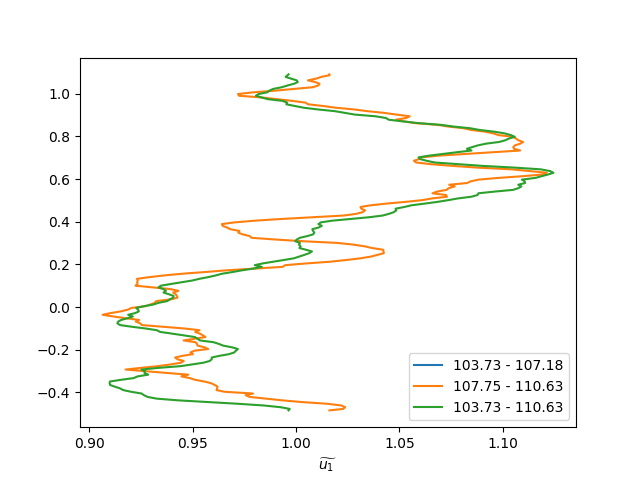

<IPython.core.display.Javascript object>


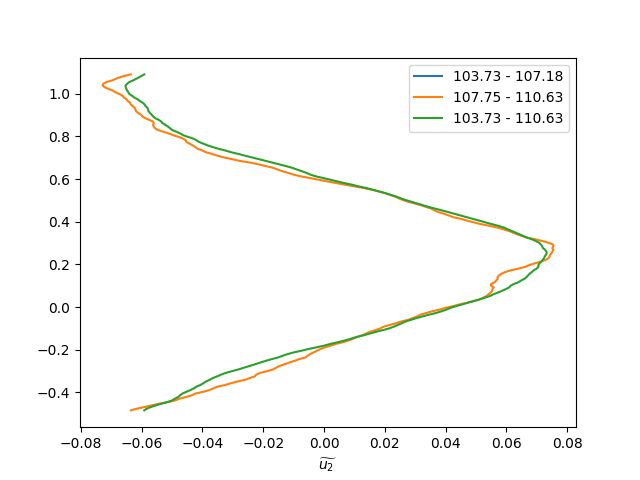

<IPython.core.display.Javascript object>


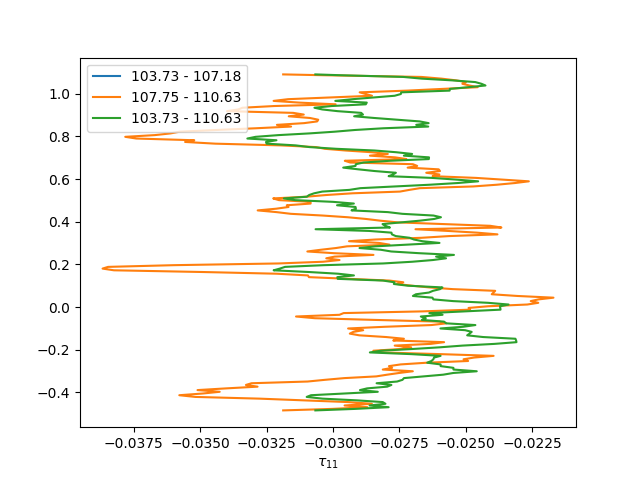

<IPython.core.display.Javascript object>


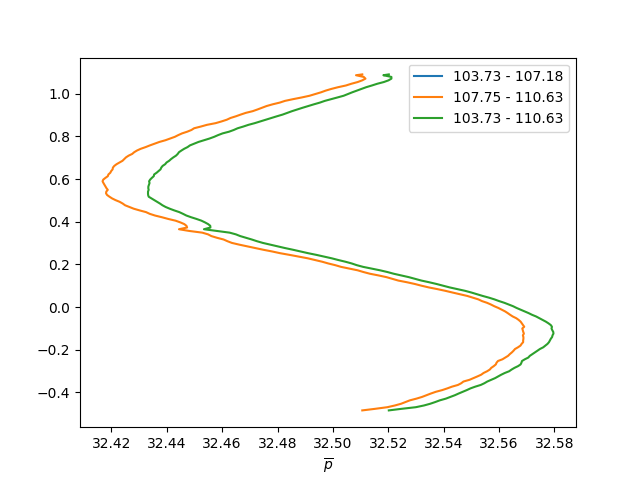

In [8]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [9]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [10]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

Reading file in CGNS format
Extracting line
Found 300 points.
Reading file in CGNS format
Extracting line
Found 300 points.
Reading file in CGNS format
Extracting line
Found 300 points.


<IPython.core.display.Javascript object>


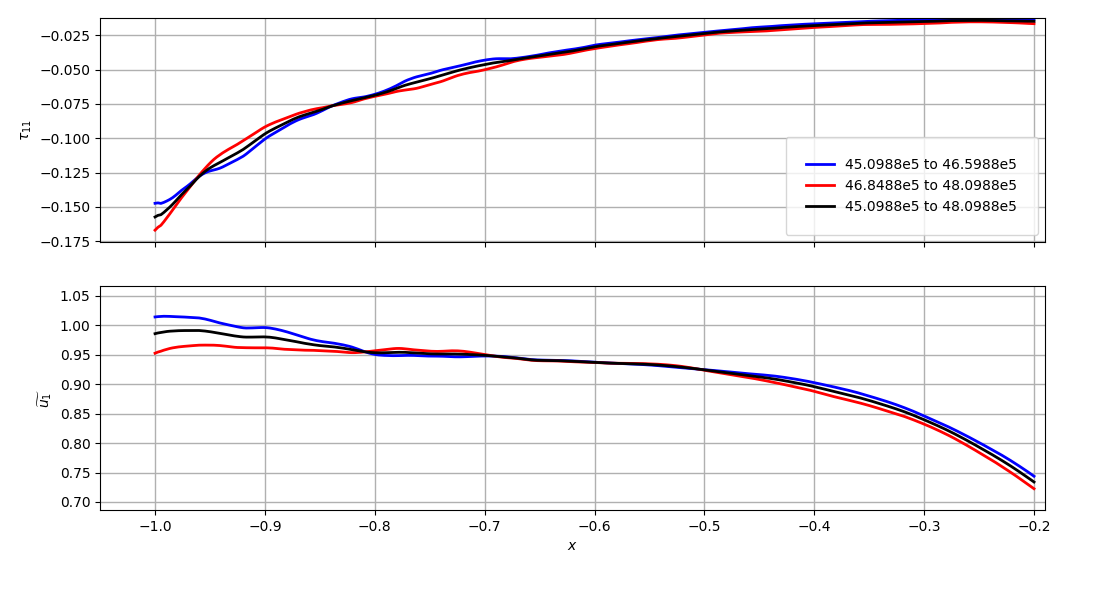

<IPython.core.display.Javascript object>


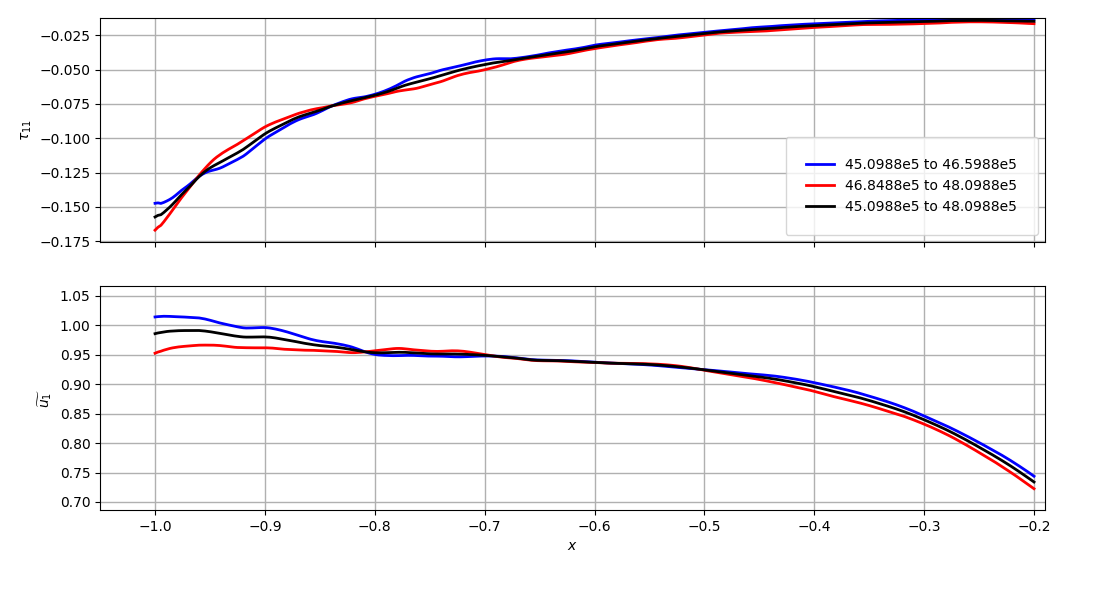

In [11]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,2))
inlet_stream.plot_var([0],pl_var)

# Blade Profiles

<IPython.core.display.Javascript object>


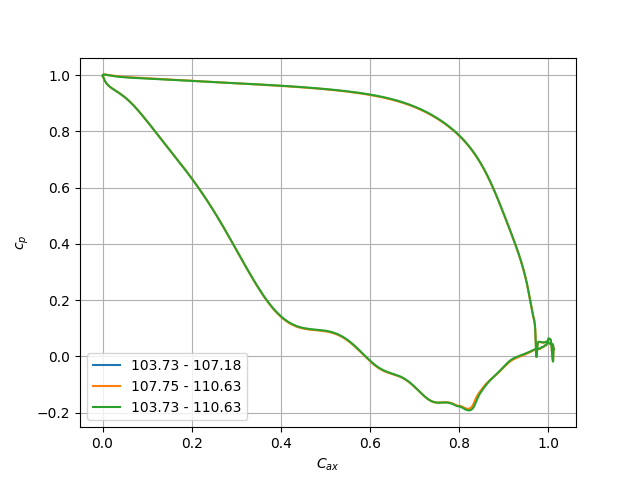

In [12]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


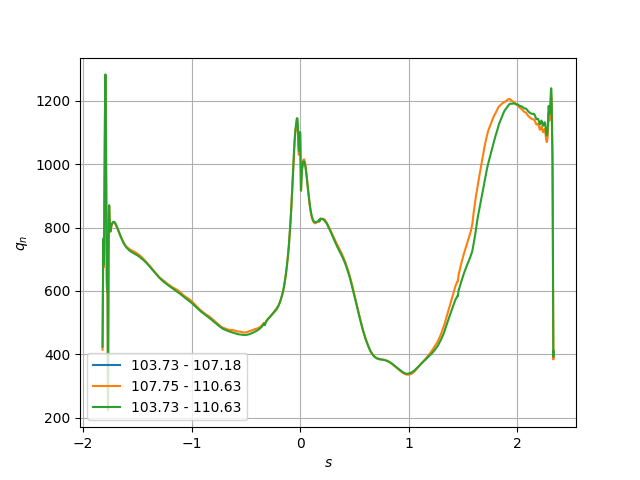

In [14]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.qnorm_new,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

## Outlet region

<IPython.core.display.Javascript object>


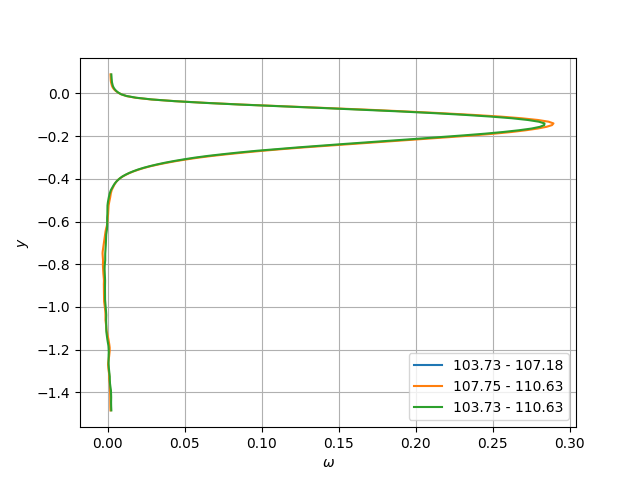

In [21]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')